<table align="left">
<td vertical-align="bottom">
<a target="_blank" align="center" href="https://stepup.ai/train_data_augmentation_keras"><img height="32px" src="https://stepup.ai/favicon.png"/>Follow on stepup.ai</a>
</td>
<td>
 <a  target="_blank" href="https://colab.research.google.com/github/dufourpascal/stepupai/blob/master/tutorials/data_augmentation/train_data_augmentation_keras.ipynb"><img style="margin-bottom:10px" src="https://www.tensorflow.org/images/colab_logo_32px.png" />Run in Google Colab</a>
</td>
<td>
<a target="_blank" href="https://github.com/dufourpascal/stepupai/blob/master/tutorials/data_augmentation/train_data_augmentation_keras.ipynb"><img style="margin-bottom:10px" class="invertable-logo" src="https://www.tensorflow.org/images/GitHub-Mark-32px.png"/>View source on GitHub</a>
</td>
<td>
<a href="https://drive.google.com/file/d/1-PBQVVUWhyQ_ctZFqMH02XihvmHOCjIe/view?usp=sharing" download><img class="invertable-logo" style="margin-bottom:10px" src="https://www.tensorflow.org/images/download_logo_32px.png"/>Download notebook</a>
</td>
</table>

# Training with Data Augmentation in Keras
In this tutorial, we are going to train a Cifar10 classifier from scratch and see how much benefit data augmentation can bring.
Follow along on the [blog post](https://stepup.ai/train_data_augmentation_keras) for descriptions and a detailed discussion!

# Setup

## Imports and Helper Functions
First we define the imports for tensorflow, keras and matplotlib.

In [1]:
import tensorflow as tf
from tensorflow.keras.datasets import cifar10
from tensorflow.keras import layers, models
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.utils import to_categorical
import matplotlib.pyplot as plt

And we're going to define a helper function to plot the first few images in a dataset.

In [2]:
def visualize_data(images, categories, class_names):
    fig = plt.figure(figsize=(14, 6))
    fig.patch.set_facecolor('white')
    for i in range(3 * 7):
        plt.subplot(3, 7, i+1)
        plt.xticks([])
        plt.yticks([])
        plt.imshow(images[i])
        class_index = categories[i].argmax()
        plt.xlabel(class_names[class_index])
    plt.show()

## Load and Cifar10 Dataset
Now let's import the Cifar10 dataset and plot a few images along with their classes.

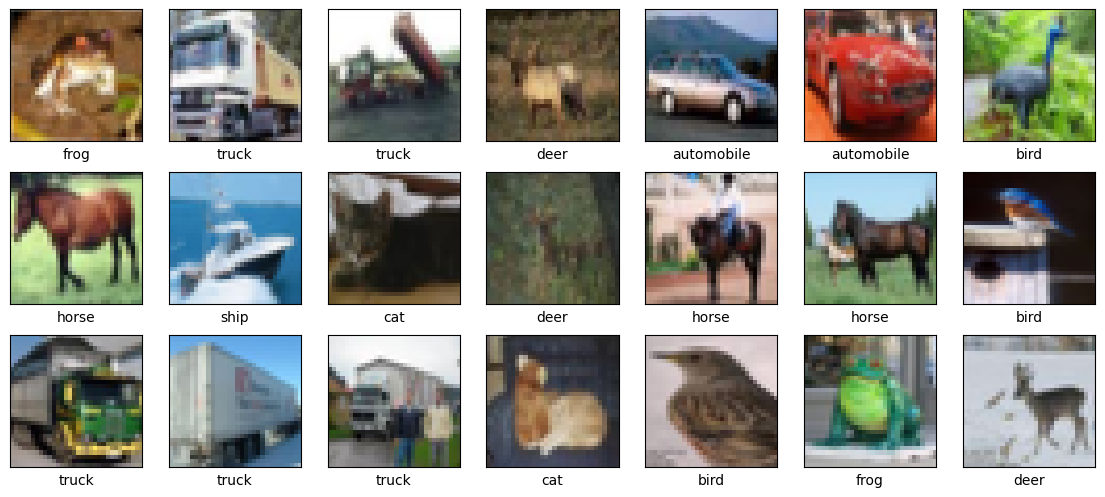

In [3]:
class_names = ['airplane', 'automobile', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck']
num_classes = len(class_names)

(x_train, y_train), (x_test, y_test) = cifar10.load_data()

x_train = x_train / 255.0
y_train = to_categorical(y_train, num_classes)

x_test = x_test / 255.0
y_test = to_categorical(y_test, num_classes)

visualize_data(x_train, y_train, class_names)

# Classifier Training

## Define the Model
We are going to create a function that creates a VGG style convolutional neural network classifier.

In [4]:
def create_model():
    model = models.Sequential()
    model.add(layers.Conv2D(32, (3, 3), activation='relu', padding='same', input_shape=(32, 32, 3)))
    model.add(layers.Conv2D(32, (3, 3), activation='relu', padding='same'))
    model.add(layers.MaxPool2D((2,2)))

    model.add(layers.Conv2D(64, (3, 3), activation='relu', padding='same',))
    model.add(layers.Conv2D(64, (3, 3), activation='relu', padding='same',))
    model.add(layers.MaxPool2D((2,2)))

    model.add(layers.Conv2D(128, (3, 3), activation='relu', padding='same',))
    model.add(layers.Conv2D(128, (3, 3), activation='relu', padding='same',))
    model.add(layers.MaxPool2D((2,2)))

    model.add(layers.Dropout(0.2))
    model.add(layers.Conv2D(256, (3, 3), activation='relu', padding='same',))
    model.add(layers.Conv2D(256, (3, 3), activation='relu', padding='same',))
    model.add(layers.MaxPool2D(2,2))
    model.add(layers.Dropout(0.2))

    model.add(layers.Flatten())
    model.add(layers.Dense(128, activation='relu'))
    model.add(layers.Dense(10, activation='softmax'))

    model.compile(optimizer='adam',
                  loss='categorical_crossentropy',
                  metrics=['accuracy'])

    return model

## Train without Data Augmentation
First we define the basic parameters for model training, such as batch size and number of epochs.
Then we instantiate the model and show the summary. Finally we train it with the unaugmented Cifar10 dataset.

In [5]:
batch_size = 32
epochs = 16
m_no_aug = create_model()
m_no_aug.summary()

history_no_aug = m_no_aug.fit(
    x_train, y_train,
    epochs=epochs, batch_size=batch_size,
    validation_data=(x_test, y_test))

loss_no_aug, acc_no_aug = m_no_aug.evaluate(x_test,  y_test)

/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 32, 32, 32)     │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 32, 32, 32)     │         9,248 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 16, 16, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 16, 16, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_3 (Conv2D)               │ (None, 16, 16, 64)     │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 8, 8, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_4 (Conv2D)               │ (None, 8, 8, 128)      │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_5 (Conv2D)               │ (None, 8, 8, 128)      │       147,584 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 4, 4, 128)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 4, 4, 128)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_6 (Conv2D)               │ (None, 4, 4, 256)      │       295,168 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_7 (Conv2D)               │ (None, 4, 4, 256)      │       590,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_3 (MaxPooling2D)  │ (None, 2, 2, 256)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 2, 2, 256)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 1024)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 128)            │       131,200 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 10)             │         1,290 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 1,304,746 (4.98 MB)

 Trainable params: 1,304,746 (4.98 MB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/16
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 25s 11ms/step - accuracy: 0.2986 - loss: 1.8540 - val_accuracy: 0.5163 - val_loss: 1.3201
Epoch 2/16
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 31s 7ms/step - accuracy: 0.5571 - loss: 1.2330 - val_accuracy: 0.6199 - val_loss: 1.0817
Epoch 3/16
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 20s 7ms/step - accuracy: 0.6509 - loss: 0.9893 - val_accuracy: 0.6815 - val_loss: 0.9027
Epoch 4/16
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 11s 7ms/step - accuracy: 0.6987 - loss: 0.8564 - val_accuracy: 0.6971 - val_loss: 0.8671
Epoch 5/16
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 11s 7ms/step - accuracy: 0.7302 - loss: 0.7599 - val_accuracy: 0.7131 - val_loss: 0.8340
Epoch 6/16
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 21s 7ms/step - accuracy: 0.7594 - loss: 0.6880 - val_accuracy: 0.7298 - val_loss: 0.7708
Epoch 7/16
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 20s 7ms/step - accuracy: 0.7784 - loss: 0.6293 - val_accuracy: 0.7355 - val_loss: 0.7687
Epoch 8/16
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 12s 7ms/step - accuracy: 0.7930 - loss: 

## Define Data Augmentation
Now it's time to set up our data augmentation pipeline.
First we define the augmentation parameters and then we instantiate the data generator.
We also plot a few augmented images to make sure that everything is ok

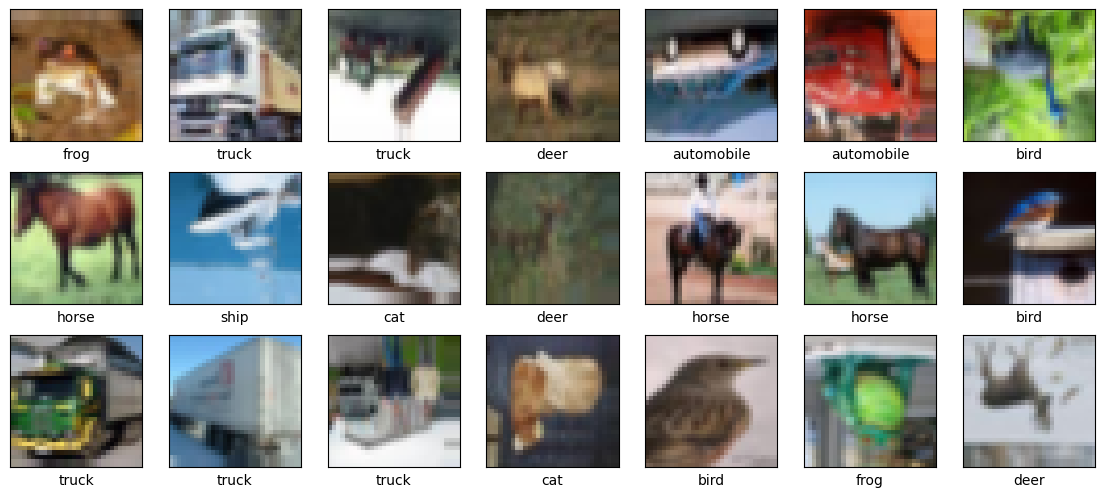

In [22]:
width_shift = 3/32
height_shift = 3/32
flip = True

datagen = ImageDataGenerator(
    horizontal_flip=flip,
    vertical_flip=flip,
    width_shift_range=width_shift,
    height_shift_range=height_shift,
    )
datagen.fit(x_train)

it = datagen.flow(x_train, y_train, shuffle=False)
batch_images, batch_labels = next(it)
visualize_data(batch_images, batch_labels, class_names)

## Train with Data Augmentation
Let's perform the training again, this time with data augmentation!

In [24]:
m_aug = create_model()
datagen.fit(x_train)

history_aug = m_aug.fit(
    datagen.flow(x_train, y_train, batch_size=batch_size),
    epochs=epochs,
    validation_data=(x_test, y_test))
loss_aug, acc_aug = m_aug.evaluate(x_test,  y_test)

Epoch 1/16
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 44s 25ms/step - accuracy: 0.0981 - loss: 2.3031 - val_accuracy: 0.1000 - val_loss: 2.3026
Epoch 2/16
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 34s 22ms/step - accuracy: 0.0987 - loss: 2.3027 - val_accuracy: 0.1000 - val_loss: 2.3026
Epoch 3/16
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 33s 21ms/step - accuracy: 0.0965 - loss: 2.3028 - val_accuracy: 0.1000 - val_loss: 2.3026
Epoch 4/16
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 34s 22ms/step - accuracy: 0.1012 - loss: 2.3026 - val_accuracy: 0.1000 - val_loss: 2.3026
Epoch 5/16
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 40s 21ms/step - accuracy: 0.0974 - loss: 2.3028 - val_accuracy: 0.1000 - val_loss: 2.3026
Epoch 6/16
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 34s 22ms/step - accuracy: 0.1005 - loss: 2.3027 - val_accuracy: 0.1000 - val_loss: 2.3026
Epoch 7/16
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 34s 22ms/step - accuracy: 0.0983 - loss: 2.3027 - val_accuracy: 0.1000 - val_loss: 2.3027
Epoch 8/16
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 35s 22ms/step - accuracy: 0.1003 -

# Results
Let's compare the two runs in a single graph:

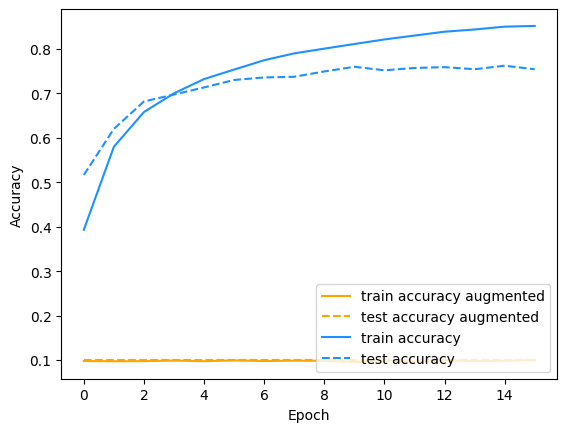

In [25]:
fig = plt.figure()
fig.patch.set_facecolor('white')

plt.plot(history_aug.history['accuracy'],
         label='train accuracy augmented',
         c='orange', ls='-')
plt.plot(history_aug.history['val_accuracy'],
         label='test accuracy augmented',
         c='orange',ls='--')

plt.plot(history_no_aug.history['accuracy'],
         label='train accuracy',
         c='dodgerblue', ls='-')
plt.plot(history_no_aug.history['val_accuracy'],
         label='test accuracy',
         c='dodgerblue', ls='--')

plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(loc='lower right')
plt.show()

And lets also have a look at the loss curves:

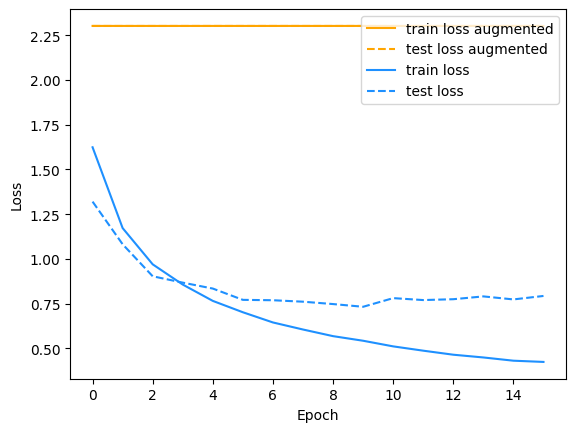

In [26]:
fig = plt.figure()
fig.patch.set_facecolor('white')

plt.plot(history_aug.history['loss'],
         label='train loss augmented',
         c='orange', ls='-')
plt.plot(history_aug.history['val_loss'],
         label='test loss augmented',
         c='orange',ls='--')

plt.plot(history_no_aug.history['loss'],
         label='train loss',
         c='dodgerblue', ls='-')
plt.plot(history_no_aug.history['val_loss'],
         label='test loss',
         c='dodgerblue', ls='--')

plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend(loc='upper right')
plt.show()

In [19]:
# Non-Augmented
print(f"Train Accuracy: {history_no_aug.history['accuracy'][-1]}")
print(f"Test Accuracy: {history_no_aug.history['val_accuracy'][-1]}")
print(f"Train Loss: {history_no_aug.history['loss'][-1]}")
print(f"Test Loss: {history_no_aug.history['val_loss'][-1]}")

Train Accuracy: 0.8513399958610535
Test Accuracy: 0.7540000081062317
Train Loss: 0.4236680865287781
Test Loss: 0.7926191687583923


In [20]:
# Augmented
print(f"Train Accuracy: {history_aug.history['accuracy'][-1]}")
print(f"Test Accuracy: {history_aug.history['val_accuracy'][-1]}")
print(f"Train Loss: {history_aug.history['loss'][-1]}")
print(f"Test Loss: {history_aug.history['val_loss'][-1]}")

Train Accuracy: 0.7540799975395203
Test Accuracy: 0.7483999729156494
Train Loss: 0.7182393670082092
Test Loss: 0.7502021193504333


Head over to the [blog post](https://stepup.ai/train_data_augmentation_keras) for a detailed discussion!